In [14]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
class KNN:
    def __init__(self, k, x_train, y_train):
        self.k = k
        self.x_train = x_train
        self.y_train = y_train
    
    def predict_class(self, test_point):
        all_distances = np.sqrt(np.sum((self.x_train - test_point) ** 2, axis=1))
        nearestk_indices = np.argsort(all_distances)[:self.k]
        nearestk_labels = self.y_train[nearestk_indices]
        
        uni_classes, counts = np.unique(nearestk_labels, return_counts=True)
        return uni_classes[np.argmax(counts)]
    
    def predict(self, x_test):
        y_test_pred = np.array([self.predict_class(test_point) for test_point in x_test])
        return y_test_pred


In [9]:
data_d2z = np.loadtxt("hw3Data/D2z.txt")
train_x = np.array(data_d2z[:, :-1])
train_y = np.array(data_d2z[:, -1])

knn_model = KNN(k=1, x_train=train_x, y_train=train_y)

In [10]:
test_x = []

for i in np.arange(-2, 2.1, 0.1):
    for j in np.arange(-2, 2.1, 0.1):
        test_x.append(np.array([i, j]))

test_x = np.array(test_x)

In [11]:
test_y_predicted = knn_model.predict(test_x)

In [12]:
train_x_zeros = train_x[train_y == 0]
train_x_ones = train_x[train_y == 1]

test_x_zeros = test_x[test_y_predicted == 0]
test_x_ones = test_x[test_y_predicted == 1]

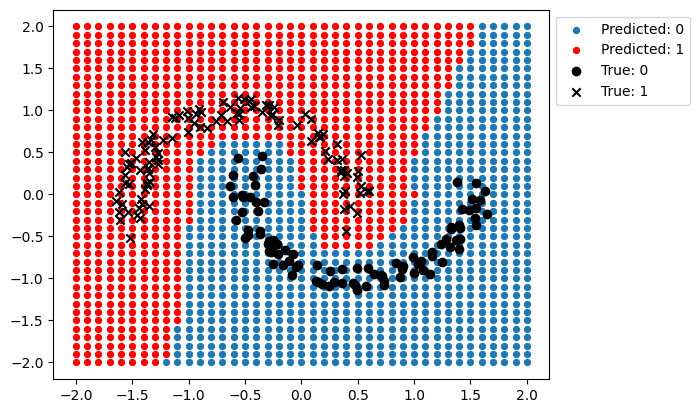

In [13]:
plt.scatter(test_x_zeros[:, 0], test_x_zeros[:, 1], label='Predicted: 0', s=18)
plt.scatter(test_x_ones[:, 0], test_x_ones[:, 1], color='red', label="Predicted: 1", s=18)
plt.scatter(train_x_zeros[:,0], train_x_zeros[:, 1], color='black', marker='o', label="True: 0")
plt.scatter(train_x_ones[:, 0], train_x_ones[:, 1], color='black', marker='x', label="True: 1")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [23]:
data_emails = pd.read_csv("hw3Data/emails.csv")

x_data = np.array(data_emails.iloc[:, 1:-1])
y_data = np.array(data_emails.iloc[:, -1])

n_folds = 5
size_fold = len(x_data)//n_folds

In [24]:
def calculate_metrics(y_test, y_test_pred):
    tp = np.sum(np.logical_and(y_test == 1, y_test_pred == 1))
    tn = np.sum(np.logical_and(y_test == 0, y_test_pred == 0))
    fp = np.sum(np.logical_and(y_test == 0, y_test_pred == 1))
    fn = np.sum(np.logical_and(y_test == 1, y_test_pred == 0))
    
    acc = np.sum(y_test == y_test_pred)/len(y_test)
    pre = tp/(tp+fp)
    rec = tp/(tp+fn)
    return acc, pre, rec

In [25]:
def get_metric_allfolds(n_folds, size_fold, k, x_data, y_data):
    accuracy_all = []
    precision_all = []
    recall_all = []
    
    for i in range(n_folds):
        #print(i)
        start = i*size_fold
        end = (i+1)*size_fold
        x_train = np.concatenate((x_data[:start], x_data[end:]), axis=0)
        y_train = np.concatenate((y_data[:start], y_data[end:]), axis=0)
        x_test = x_data[start:end]
        y_test = y_data[start:end]
    
        knn_model = KNN(k, x_train, y_train)
        y_pred = knn_model.predict(x_test)
    
        acc, pre, rec = calculate_metrics(y_test, y_pred)
        #print(acc)
        accuracy_all.append(acc)
        precision_all.append(pre)
        recall_all.append(rec)
    return accuracy_all, precision_all, recall_all

In [19]:
accuracy_all, precision_all, recall_all = get_metric_allfolds(n_folds, size_fold, 1, x_data, y_data)

from tabulate import tabulate
folds = [1, 2, 3, 4, 5]
data = list(zip(folds, accuracy_all, precision_all, recall_all))

headers = ["Fold", "Accuracy", "Precision", "Recall"]

table = tabulate(data, headers=headers, tablefmt="fancy_grid")
print(table)

╒════════╤════════════╤═════════════╤══════════╕
│   Fold │   Accuracy │   Precision │   Recall │
╞════════╪════════════╪═════════════╪══════════╡
│      1 │      0.825 │    0.653631 │ 0.821053 │
├────────┼────────────┼─────────────┼──────────┤
│      2 │      0.855 │    0.689655 │ 0.866426 │
├────────┼────────────┼─────────────┼──────────┤
│      3 │      0.863 │    0.722054 │ 0.841549 │
├────────┼────────────┼─────────────┼──────────┤
│      4 │      0.854 │    0.721557 │ 0.819728 │
├────────┼────────────┼─────────────┼──────────┤
│      5 │      0.775 │    0.605195 │ 0.761438 │
╘════════╧════════════╧═════════════╧══════════╛


In [20]:
k_values = [1, 3, 5, 7, 10]
all_avg_acc = []
for k in k_values:
    acc_array, _, _ = get_metric_allfolds(n_folds, size_fold, k, x_data, y_data)
    all_avg_acc.append(np.mean(np.array(acc_array)))

Text(0, 0.5, 'Accuracy')

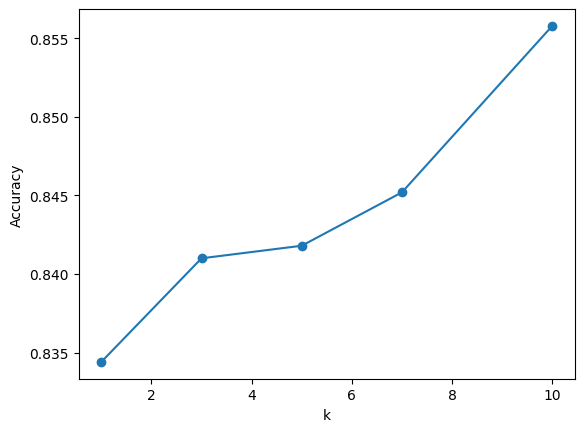

In [21]:
plt.plot(k_values, all_avg_acc, marker='o')
plt.xlabel("k")
plt.ylabel("Accuracy")

In [22]:
from tabulate import tabulate
data = list(zip(k_values, all_avg_acc))

headers = ["k", " Average Accuracy"]

table = tabulate(data, headers=headers, tablefmt="fancy_grid")
print(table)

╒═════╤═════════════════════╕
│   k │    Average Accuracy │
╞═════╪═════════════════════╡
│   1 │              0.8344 │
├─────┼─────────────────────┤
│   3 │              0.841  │
├─────┼─────────────────────┤
│   5 │              0.8418 │
├─────┼─────────────────────┤
│   7 │              0.8452 │
├─────┼─────────────────────┤
│  10 │              0.8558 │
╘═════╧═════════════════════╛


In [26]:
class LR:
    def __init__(self, num_epochs, lr):
        #self.x_train = x_train
        #self.y_train = y_train
        self.num_epochs = num_epochs
        self.lr = lr
        self.w = None
        self.b = None
        
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))
    
    def train_model(self, x_train, y_train):
        num_samples, num_features = x_train.shape
        self.w = np.zeros(num_features)
        self.b = 0
        
        for i in range(self.num_epochs):
            pred = self.sigmoid(np.dot(x_train, self.w)+self.b)
            
            dw = 1/num_samples*(np.dot(x_train.T, (pred-y_train)))
            db = 1/num_samples*np.sum(pred-y_train)
            
            self.w -= self.lr*dw
            self.b -= self.lr*db
            
    def predictions(self, x_test):
        y_pred_values = self.sigmoid(np.dot(x_test, self.w)+self.b)
        return np.array([1 if i>0.5 else 0 for i in y_pred_values])

In [27]:
def get_metric_allfolds_lr(n_folds, size_fold, x_data, y_data, num_epochs, lr):
    accuracy_all = []
    precision_all = []
    recall_all = []
    
    for i in range(n_folds):
        print(i)
        start = i*size_fold
        end = (i+1)*size_fold
        x_train = np.concatenate((x_data[:start], x_data[end:]), axis=0)
        y_train = np.concatenate((y_data[:start], y_data[end:]), axis=0)
        x_test = x_data[start:end]
        y_test = y_data[start:end]
    
        lr_model = LR(num_epochs, lr)
        lr_model.train_model(x_train, y_train)
        y_pred = lr_model.predictions(x_test)
    
        acc, pre, rec = calculate_metrics(y_test, y_pred)
        accuracy_all.append(acc)
        precision_all.append(pre)
        recall_all.append(rec)
    return accuracy_all, precision_all, recall_all

In [48]:
accuracy_all, precision_all, recall_all = get_metric_allfolds_lr(n_folds, size_fold, x_data, y_data, 10000, 0.1)

0


/var/folders/cv/c2hpprss63v2l4l6gdkmlcrr0000gp/T/ipykernel_99666/1790474804.py:11: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


1
2
3
4


In [49]:
from tabulate import tabulate
folds = [1, 2, 3, 4, 5]
data = list(zip(folds, accuracy_all, precision_all, recall_all))

headers = ["Fold", "Accuracy", "Precision", "Recall"]

table = tabulate(data, headers=headers, tablefmt="fancy_grid")
print(table)

╒════════╤════════════╤═════════════╤══════════╕
│   Fold │   Accuracy │   Precision │   Recall │
╞════════╪════════════╪═════════════╪══════════╡
│      1 │      0.953 │    0.928058 │ 0.905263 │
├────────┼────────────┼─────────────┼──────────┤
│      2 │      0.939 │    0.9      │ 0.877256 │
├────────┼────────────┼─────────────┼──────────┤
│      3 │      0.941 │    0.931034 │ 0.855634 │
├────────┼────────────┼─────────────┼──────────┤
│      4 │      0.948 │    0.898026 │ 0.928571 │
├────────┼────────────┼─────────────┼──────────┤
│      5 │      0.922 │    0.88     │ 0.862745 │
╘════════╧════════════╧═════════════╧══════════╛


In [38]:
from sklearn import metrics

In [39]:
data_emails = pd.read_csv("hw3Data/emails.csv")

x_data = np.array(data_emails.iloc[:, 1:-1])
y_data = np.array(data_emails.iloc[:, -1])

x_train = x_data[:4000]
y_train = y_data[:4000]
x_test = x_data[4000:]
y_test = y_data[4000:]

In [46]:
knn_model = KNN(5, x_train, y_train)
y_pred_knn = knn_model.predict(x_test)

lr_model = LR(10000, 0.1)
lr_model.train_model(x_train, y_train)
y_pred_lr = lr_model.predictions(x_test)

/var/folders/cv/c2hpprss63v2l4l6gdkmlcrr0000gp/T/ipykernel_63093/1790474804.py:11: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


In [47]:
fpr_knn, tpr_knn, thresholds_knn = metrics.roc_curve(y_test, y_pred_knn)
fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(y_test, y_pred_lr)

In [48]:
auc_knn = metrics.roc_auc_score(y_test, y_pred_knn)
auc_lr = metrics.roc_auc_score(y_test, y_pred_lr)

In [52]:
auc_knn, auc_lr

(0.7704366088414233, 0.9054359495959767)

Text(0, 0.5, 'Recall')

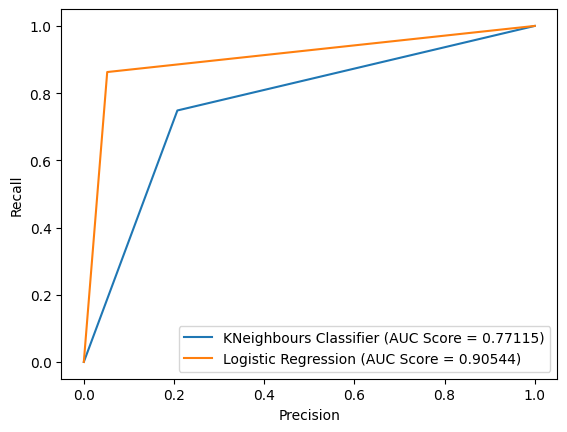

In [53]:
plt.plot(fpr_knn, tpr_knn)
plt.plot(fpr_lr, tpr_lr)
plt.legend(['KNeighbours Classifier (AUC Score = 0.77115)', 'Logistic Regression (AUC Score = 0.90544)'])
plt.xlabel("Precision")
plt.ylabel("Recall")

In [12]:
x = [0, 0, 0.25, 0.25, 0.5, 0.75, 1]
y = [0, 0.33, 0.5, 0.66, 0.83, 1, 1]

Text(0, 0.5, 'Recall')

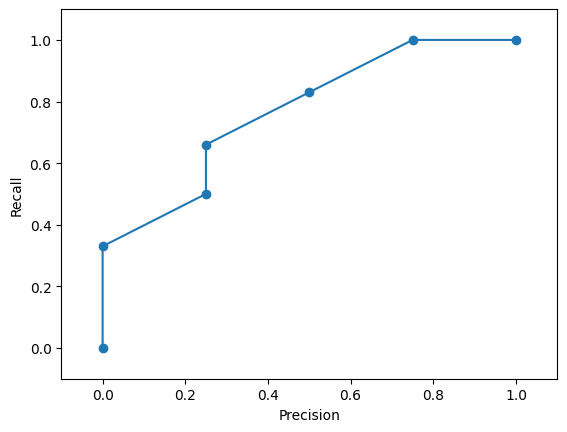

In [13]:
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.plot(x, y, marker='o')
plt.xlabel("Precision")
plt.ylabel("Recall")